## Final Project Submission

Please fill out:
* Student name: Maureen Wangonyo Kariuki
* Student pace: part time
* Scheduled project review date/time: 17/04/2023
* Instructor name: Everlyn Asiko
* Blog post URL:


# Box Office Best Hits Project

## 1. Project Goal

The aim of this project is to identify the best performing films in the box office

## 2. Business Understanding

To assist in deciding what type of films to make in the new Microsoft movie studio. 

This is by considering multiple factors e.g. how different genres perform based on revenue and ratings 

## 3. Data Sources and Understanding

The Data sources we'll use are from below sources which provide ample data on different films that will enable us to conduct a conclusive anaysis on the most successful films.

<a href="https://www.boxofficemojo.com" target="_blank">boxoffice mojo</a>

<a href="https://www.imdb.com" target="_blank">imbd</a>

<a href="https://www.rottentomatoes.com" target="_blank">rotten tomatoes</a>

<a href="https://www.the-numbers.com" target="_blank">the numbers</a>

-


Data Glosary

**title** - movie titles

**studio** - studio responsible for the movies

**domestic gross** - revenue from domestic market

**foreign gross** - revenue from foreign market

**genres** - classification of the movie make type

**averagerating** - ranking of standard of film quality

**numvotes** - viewers numbered votes


### 3.1 Data Loading

We will import our datasets into our file

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#connect to gross data source

gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
#connect to database data source

import sqlite3
conn =sqlite3.connect('zippedData/im.db')

## 4. Data Exploration

Let's preview and explore our datasets!

In [4]:
#preview revenue data
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

The rest of the columns seem okay except the foreign_gross column datatype is an object

In [8]:
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [9]:
gross_df.sample(5)

,title,studio,domestic_gross,foreign_gross,year
1233,Delivery Man,BV,30700000.0,19300000,2013
3166,Adrift,STX,31400000.0,28500000,2018
432,Detective Dee and the Mystery of the Phantom F...,IM,460000.0,51300000,2011
2802,The Emoji Movie,Sony,86100000.0,131699999,2017
1002,Son of Sardaar,Eros,772000.0,NaN,2012


In [10]:
# let's preview database data
q1 = """
SELECT *
FROM movie_basics;
"""

movie_basics = pd.read_sql(q1, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#lets explore our movie basics table

movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Our main table gross_df has 3118 records

There seems to be movie with year 2115 could this be a data entry issue but we not be using this as a variable for our analysis

Also, there movies that show to be 1 minute and 51420 minutes, this seems wrong. We could remove these outliers they are far from the mean 

In [13]:
#are there nulls on the primary_title because that is our common column to the gross_df
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Great, primary title has no nulls

There is a number of null values on the genres column which we will be using

In [14]:
movie_basics.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [15]:
#let's preview movie_ratings table

q2 = """
SELECT *
FROM movie_ratings;
"""

movie_ratings = pd.read_sql(q2, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [18]:
movie_ratings.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

## 5. Data Cleaning and Preparation

We are going to clean our data and prepare it for analysis.

In [19]:
#let's start by correcting foreign gross datatype
gross_df['foreign_gross'].dtype

dtype('O')

In [20]:
#change foreign gross datatype to float

# remove commas making the column to seen as a string
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace("," ,"")

#change datatype to float
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(float)

In [21]:
#let's check the column datatypes
gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [22]:
#statistical summary
gross_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Great, all the numeric columns are good now.

In [23]:
#let's check if any of the movies are duplicated

gross_df['title'].duplicated().value_counts()

False    3386
True        1
Name: title, dtype: int64

There seem to be one film that is duplicated, we will drop this record.

In [24]:
#drop duplicate title
gross_df.drop_duplicates(subset=['title'], inplace=True)

In [25]:
#the years for our dataset
gross_df['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    320
2018    308
Name: year, dtype: int64

In [26]:
# lets check quantity of null values in our columns 
gross_df.isnull().mean()

title             0.000000
studio            0.001477
domestic_gross    0.008269
foreign_gross     0.398405
year              0.000000
dtype: float64

The foreign_gross column has a high number of null values.

In [27]:
#lets check to see if rows with null domestic gross are also null on the foreign gross column. 
# if so we can drop this columns

gross_df[(gross_df['domestic_gross'].isnull() == True) & (gross_df['foreign_gross'].isnull() == True)]

,title,studio,domestic_gross,foreign_gross,year


It seems all rows with null domestic values have foreign gross values

Maybe these films did not sell domestically but were instead made for the foreign market

In [28]:
gross_df[gross_df['studio'].isnull() == True]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000.0,2017


Lets make the null studio records a category and keep this data

Replace the 5 records with no domestic gross values with mean of the column as every movies has to sell domestically first

Replace null values in the foreign columns with zero as the number of nulls is quite big and not all movies sell in international markets. 

We'll majorly use domestic gross as it has more conclusive data

In [29]:
# fix null values

gross_df['studio'].replace({np.nan: 'Unknown'}, inplace=True)
gross_df['domestic_gross'].replace({np.nan: gross_df['domestic_gross'].mean()}, inplace=True)
gross_df['foreign_gross'].replace({np.nan: 0}, inplace=True)

Text(0.5, 1.0, 'Movie Gross Revenues')

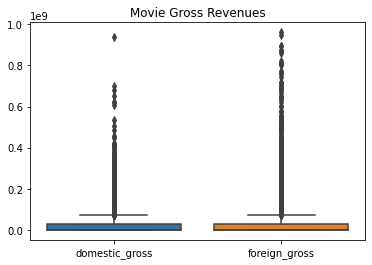

In [30]:
#lets check for outliers in the gross revenues

data_col = ['domestic_gross','foreign_gross']
sns.boxplot(data=gross_df[data_col])
plt.title('Movie Gross Revenues')

The data shows to have multiple outlier datapoints above upper whisker which are consistent.

This tough is very possible in the real world as there are movies that do perform way better than most and the revenues could vary that much

In [31]:
#lets also add a worlwide gross column to have a summation of both domestic and gross values

gross_df['worldwide_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

In [32]:
#lets preview our final dataset
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3386 non-null   object 
 1   studio           3386 non-null   object 
 2   domestic_gross   3386 non-null   float64
 3   foreign_gross    3386 non-null   float64
 4   year             3386 non-null   int64  
 5   worldwide_gross  3386 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.2+ KB


In [33]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


On to our sql tables

In [34]:
# lets check sum of nulls per column
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Let's remove the outliers on runtime column before we deal with the null values.

In [35]:
movie_basics['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

Text(0.5, 1.0, 'Movie Runtimes(min)')

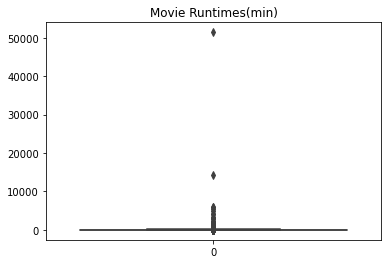

In [36]:
#lets check for outliers in the movie runtimes

sns.boxplot(data=movie_basics['runtime_minutes'])
plt.title('Movie Runtimes(min)')

It seems few movies have very high runtimes. We will remove this outliers

In [37]:
# calculate percentiles for the runtime column
Q1 = movie_basics['runtime_minutes'].quantile(0.25)
Q3 = movie_basics['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers (those outside of 1.5 times the IQR below Q1 or above Q3)
runtime_outliers = (movie_basics['runtime_minutes'] < Q1 - 1.5*IQR) | (movie_basics['runtime_minutes'] > Q3 + 1.5*IQR)

# remove outliers from the dataframe
movie_basics = movie_basics[~runtime_outliers]

Text(0.5, 1.0, 'Movie Runtimes(min)')

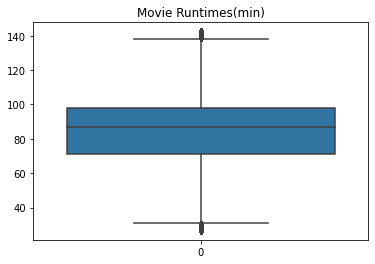

In [38]:
#lets plot again and see if outliers have been removed

sns.boxplot(data=movie_basics['runtime_minutes'].reset_index(drop=True))
plt.title('Movie Runtimes(min)')

In [39]:
#let's check for duplicate records

movie_basics[['primary_title','start_year','runtime_minutes','genres']].duplicated().sum()

126

In [40]:
duplicates=movie_basics[(movie_basics.duplicated(['primary_title','start_year','runtime_minutes','genres'])==True)]
duplicates

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
949,tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
1478,tt10127292,Plushtubers: The Apocalypse,Plushtubers: The Apocalypse,2019,NaN,"Action,Adventure"
2286,tt10230042,Rok Sako To Rok Lo,Rok Sako To Rok Lo,2018,NaN,Comedy
2303,tt10230622,Aitebaar,Aitebaar,2017,80.0,Comedy
...,...,...,...,...,...,...
144016,tt9616952,View from the Past,View from the Past,2019,NaN,Sci-Fi
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144622,tt9688944,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama


We seem to have 126 duplicates, let's drop them

In [41]:
# remove duplicated rows
movie_basics.drop_duplicates(subset=['primary_title','start_year','runtime_minutes','genres'], keep="first", inplace=True)
movie_basics.duplicated().sum() 

0

Great no duplicates

In [42]:
#let's replace null genres with unknown
#get average of runtime minutes to fill the runtime_null values as it is a small pecentage of data(21%) and we've
#cleaned the column

movie_basics['genres'].replace({np.nan: 'Unknown'}, inplace=True)
movie_basics['runtime_minutes'].replace({np.nan: movie_basics['runtime_minutes'].mean()}, inplace=True)

We have cleaned genres and runtime columns. 

Now let's drop original title we will not need this as we already have primary title with no null values and start year

In [43]:
# drop original title 

movie_basics.drop('original_title', axis=1, inplace=True)
movie_basics.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,2018,85.100092,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.000000,Comedy


In [44]:
# let's review our cleaned table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139190 entries, 1 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         139190 non-null  object 
 1   primary_title    139190 non-null  object 
 2   start_year       139190 non-null  int64  
 3   runtime_minutes  139190 non-null  float64
 4   genres           139190 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [45]:
# on to ratings
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Text(0.5, 1.0, 'Movie Ratings(avg)')

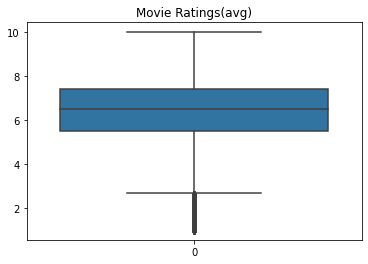

In [46]:
#lets check for outliers in the movie ratings

sns.boxplot(data=movie_ratings['averagerating'])
plt.title('Movie Ratings(avg)')

No major outliers

In [47]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [48]:
movie_basics.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,2018,85.100092,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.000000,Comedy


In [49]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Finally we will join our sql tables to the main gross_df table to have all our final dataset

In [50]:
#lets join movie basics and rating tables first

movie_details ="""
SELECT primary_title, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id=mr.movie_id
;
"""
movie_data = pd.read_sql(movie_details, conn)
movie_data

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [51]:
#let's merge this table with gross df

merged_movie_df = pd.merge(gross_df, movie_data, left_on='title', right_on='primary_title')
merged_movie_df

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Souvenir,Strand,11400.0,0.0,2018,1.140000e+04,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3021,Souvenir,Strand,11400.0,0.0,2018,1.140000e+04,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3022,Beauty and the Dogs,Osci.,8900.0,0.0,2018,8.900000e+03,Beauty and the Dogs,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3023,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,The Quake,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [52]:
#let's preview this merged dataset
merged_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 0 to 3024
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3025 non-null   object 
 1   studio           3025 non-null   object 
 2   domestic_gross   3025 non-null   float64
 3   foreign_gross    3025 non-null   float64
 4   year             3025 non-null   int64  
 5   worldwide_gross  3025 non-null   float64
 6   primary_title    3025 non-null   object 
 7   start_year       3025 non-null   int64  
 8   runtime_minutes  2978 non-null   float64
 9   genres           3018 non-null   object 
 10  averagerating    3025 non-null   float64
 11  numvotes         3025 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 307.2+ KB


There seem to be null values

In [53]:
#let's replace as we did before
merged_movie_df['genres'].replace({np.nan: 'Unknown'}, inplace=True)
merged_movie_df['runtime_minutes'].replace({np.nan: merged_movie_df['runtime_minutes'].mean()}, inplace=True)

In [54]:
# let's format gross columns into numeric then currency values for better vizualization

#merged_movie_df['domestic_gross'] = pd.to_numeric(merged_movie_df['domestic_gross'], errors='coerce')
#merged_movie_df['domestic_gross'] = merged_movie_df['domestic_gross'].map('${:,.2f}'.format)

#merged_movie_df['foreign_gross'] = pd.to_numeric(merged_movie_df['foreign_gross'], errors='coerce')
#merged_movie_df['foreign_gross'] = merged_movie_df['foreign_gross'].map('${:,.2f}'.format)

#merged_movie_df['worldwide_gross'] = pd.to_numeric(merged_movie_df['worldwide_gross'], errors='coerce')
#merged_movie_df['worldwide_gross'] = merged_movie_df['worldwide_gross'].map('${:,.2f}'.format)


In [55]:
merged_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [56]:
# confirm
merged_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 0 to 3024
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3025 non-null   object 
 1   studio           3025 non-null   object 
 2   domestic_gross   3025 non-null   float64
 3   foreign_gross    3025 non-null   float64
 4   year             3025 non-null   int64  
 5   worldwide_gross  3025 non-null   float64
 6   primary_title    3025 non-null   object 
 7   start_year       3025 non-null   int64  
 8   runtime_minutes  3025 non-null   float64
 9   genres           3025 non-null   object 
 10  averagerating    3025 non-null   float64
 11  numvotes         3025 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 307.2+ KB


## 6.  Data Analysis

Lets produce useful findings from our cleaned datasets

### 6.1 Univariate Analysis

This analysis involves single variables. Let's try and understand what they constitute

In [57]:
#let's see the most produced genres

popular_genres = merged_movie_df['genres'].value_counts()[:5]
popular_genres

Drama                   317
Comedy,Drama            133
Comedy,Drama,Romance    132
Drama,Romance           112
Documentary             110
Name: genres, dtype: int64

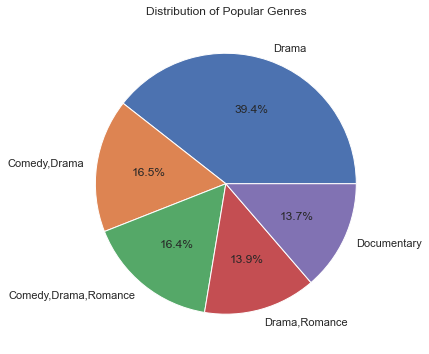

In [100]:
sns.set(style="whitegrid")

plt.figure(figsize = (10, 6))
plt.pie(popular_genres, labels=popular_genres.index, autopct='%0.1f%%')
plt.title('Distribution of Popular Genres')
plt.show()

The vizualization above shows that most made movies are of the Drama genre with almost 40% followed by Comedy/Drama(17%) then Comedy/Drama/Romance(16%).

In [59]:
#range for domestic gross

ming = merged_movie_df['domestic_gross'].min()
maxg = merged_movie_df['domestic_gross'].max()
grange = maxg - ming

print("Domestic gross range", grange)

Domestic gross range 700099900.0


In [60]:
#let's check mean, median and range for the numeric columns

merged_movie_df.describe()

,domestic_gross,foreign_gross,year,worldwide_gross,start_year,runtime_minutes,averagerating,numvotes
count,3.025000e+03,3.025000e+03,3025.000000,3.025000e+03,3025.000000,3025.000000,3025.000000,3.025000e+03
mean,3.064685e+07,4.739562e+07,2014.075702,7.804246e+07,2013.782810,107.216924,6.457719,6.174067e+04
std,6.649084e+07,1.144344e+08,2.441895,1.728565e+08,2.466864,19.922468,1.012590,1.255448e+05
min,1.000000e+02,0.000000e+00,2010.000000,1.000000e+02,2010.000000,3.000000,1.600000,5.000000e+00
25%,1.460000e+05,0.000000e+00,2012.000000,3.100000e+05,2012.000000,94.000000,5.900000,2.136000e+03
50%,2.100000e+06,2.400000e+06,2014.000000,7.439000e+06,2014.000000,105.000000,6.600000,1.312100e+04
75%,3.220000e+07,3.460000e+07,2016.000000,7.055700e+07,2016.000000,118.000000,7.100000,6.294200e+04
max,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09,2019.000000,272.000000,9.200000,1.841066e+06


In [61]:
#central tendecies of domestic gross

meand = merged_movie_df['domestic_gross'].mean()
mediand = merged_movie_df['domestic_gross'].median()
moded = merged_movie_df['domestic_gross'].mode()

print("Domestic mean :", meand)
print("")
print("Domestic median :", mediand)
print("")
print("Domestic mode :", moded)
print("")

Domestic mean : 30646845.196048416

Domestic median : 2100000.0

Domestic mode : 0    1300000.0
dtype: float64



In [62]:
# central tendencies for foreign gross

meanf = merged_movie_df['foreign_gross'].mean()
medianf = merged_movie_df['foreign_gross'].median()
modef = merged_movie_df['foreign_gross'].mode()

print("Foreign mean :", meanf)
print("")
print("Foreign median :", medianf)
print("")
print("Foreign mode :", modef)
print("")

Foreign mean : 47395618.065421484

Foreign median : 2400000.0

Foreign mode : 0    0.0
dtype: float64



Both gross revenues appear to have the same range in their values

Domestic gross have a; 

Mean : 30,646,850

Median : 2,100,000

Foreign gross have a;

Mean : 47,395,620

Median : 2,400,000

Foreign revenues are higher than gross revenues

<Figure size 432x288 with 0 Axes>

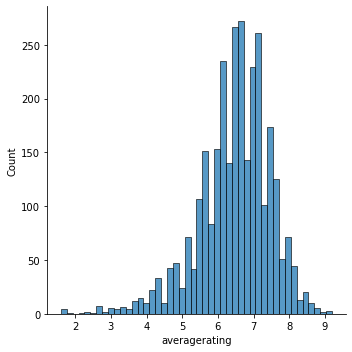

In [63]:
# lets plot ratings and see its distribution

plt.figure(figsize = (6, 4))
sns.displot(merged_movie_df.averagerating);

The distribution is close to a normal distribution with most ratings between 6 and 8

The ratings mean is 6.4

The ratings median is 6.6

(as indicated on the descibe dataframe output)

<Figure size 864x288 with 0 Axes>

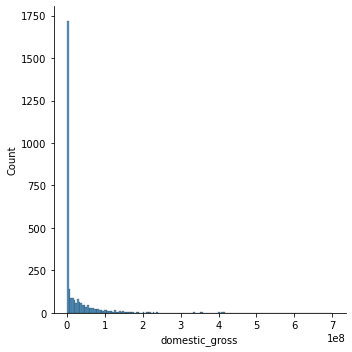

In [88]:
# lets plot film domestic values and see their distribution

plt.figure(figsize = (12, 4))
sns.displot(merged_movie_df.domestic_gross);

<Figure size 864x288 with 0 Axes>

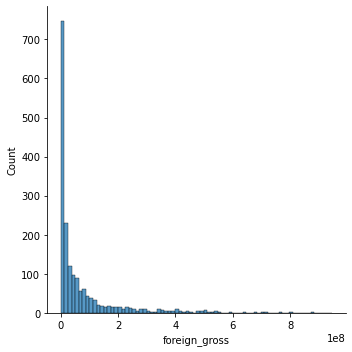

In [65]:
# lets plot film foreign values and see their distribution disregarding the value reocrds 

plt.figure(figsize = (12, 4))
sns.displot(merged_movie_df.foreign_gross[(merged_movie_df.foreign_gross > 0 ) == True]);

Distribution for both gross values are skewed to the right

Both distibutions have most of their gross revenues under $10,000,000

### 6.2 Bivariate Analysis

This analysis involves multiple variables, let's try and understand the relationships between these variables.

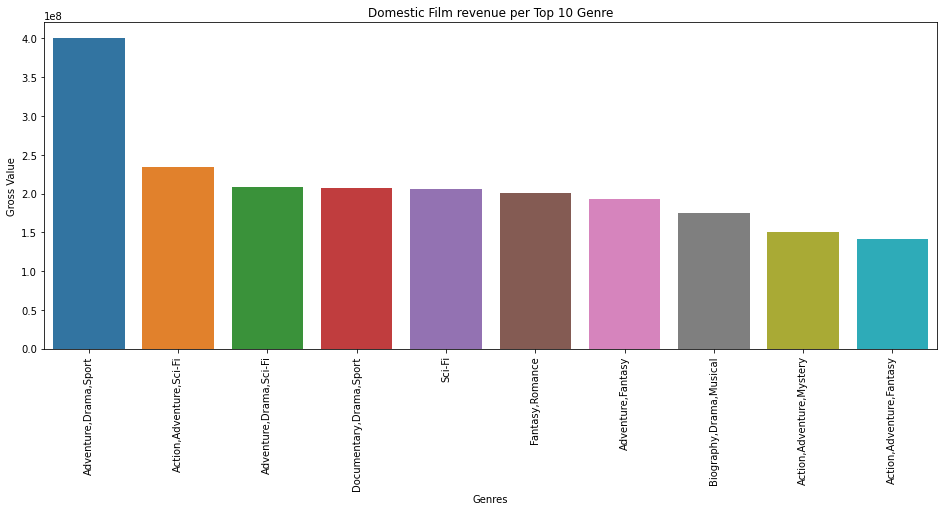

In [82]:
#let's plot genres again and see how they perfom against gross values

#group movies by genres and get their mean domestic revenues
genre_gross = merged_movie_df.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x=genre_gross.index[:10], y=genre_gross[:10])
plt.xlabel('Genres')
plt.ylabel('Gross Value')
plt.title('Domestic Film revenue per Top 10 Genre')
plt.xticks(rotation=90)
plt.show()

This vizualization shows the average domestic gross values for the top 10 genres. 

Adventure/Drama/Sport seems to be a high revenue genre, so is Action/Adventure/Sci-Fi and Adventure/Drama Sci-Fi

This should be our genres of consideration when making domestic films for revenues

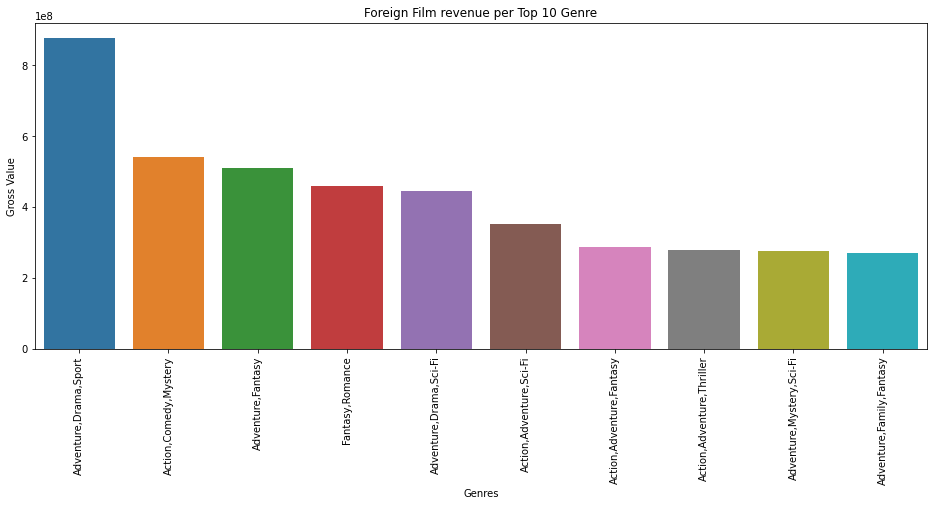

In [84]:
#group movies by genres and get their mean foreign revenues

genre_gross = merged_movie_df.groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x=genre_gross.index[:10], y=genre_gross[:10])
plt.xlabel('Genres')
plt.ylabel('Gross Value')
plt.title('Foreign Film revenue per Top 10 Genre')
plt.xticks(rotation=90)
plt.show()

This vizualization also shows Adventure/Drama/Sport is the best performing genre for foreign markets as well.

Followed by Action/Comedy/Mystery and Adventure/Fantansy

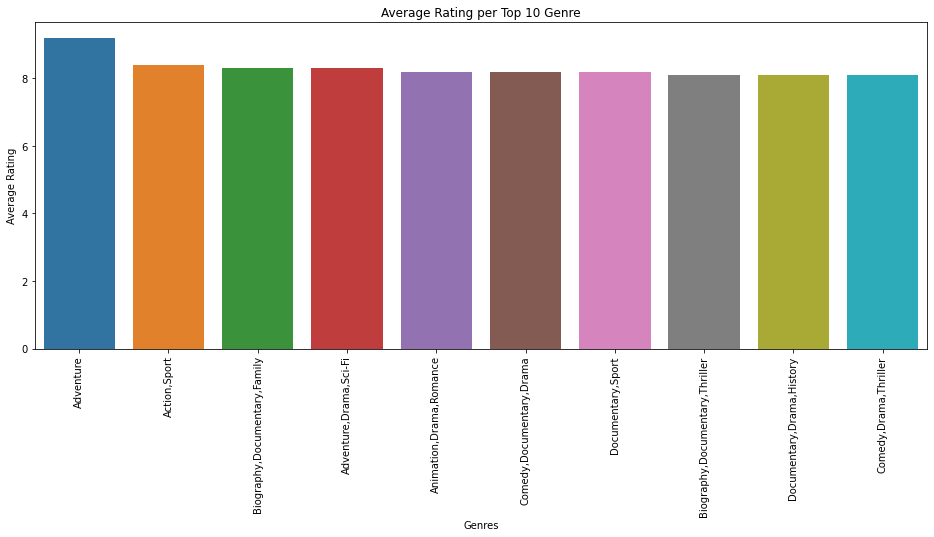

In [86]:
#let's see how the genres perform against average ratings

genre_ratings = merged_movie_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x=genre_ratings.index[:10], y=genre_ratings[:10])
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating per Top 10 Genre')
plt.xticks(rotation=90)
plt.show()

The above vizualization shows Adventure genre have the highest ratings of 9 and above.

This is followed by Action/Sport then Documentary/Biography/Family, Adventure/Drama/Sci-Fi

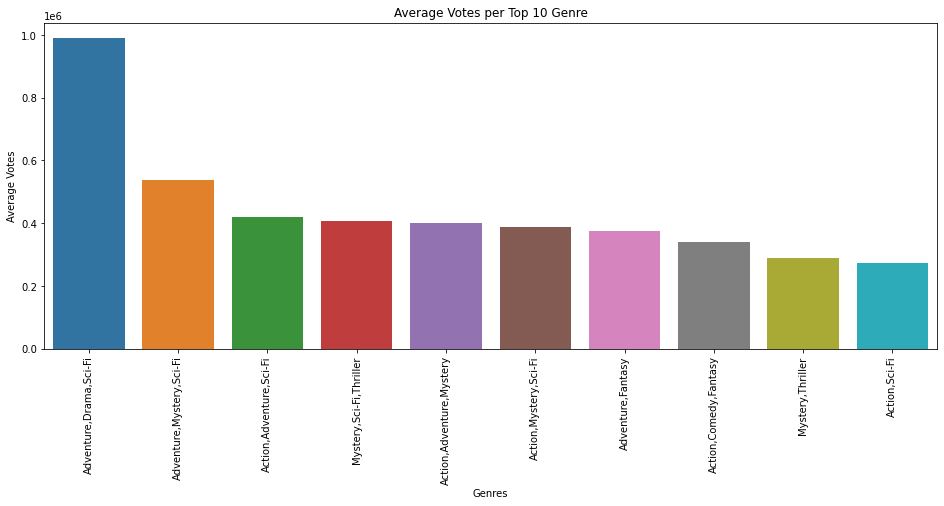

In [87]:
#let's see what genres had the highest number of votes
#this could help us know the most voted on genre

genre_votes = merged_movie_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x=genre_votes.index[:10], y=genre_votes[:10])
plt.xlabel('Genres')
plt.ylabel('Average Votes')
plt.title('Average Votes per Top 10 Genre')
plt.xticks(rotation=90)
plt.show()

This vizualization shows that the Adventure/Drama/Sci-Fi genre had the most votes

Does this have a relationship with movie success. We could assume that genre was very popular that viewers cared to vote.

In [70]:
#let's understand the relationship between ratings, votes and domestic & foreign gross, numvotes, runtimes

merged_movie_df[['domestic_gross','averagerating','numvotes','foreign_gross','runtime_minutes']].corr()

,domestic_gross,averagerating,numvotes,foreign_gross,runtime_minutes
domestic_gross,1.000000,0.118603,0.663979,0.812415,0.126108
averagerating,0.118603,1.000000,0.278355,0.107070,0.147796
numvotes,0.663979,0.278355,1.000000,0.596376,0.259779
foreign_gross,0.812415,0.107070,0.596376,1.000000,0.152403
runtime_minutes,0.126108,0.147796,0.259779,0.152403,1.000000


<AxesSubplot:>

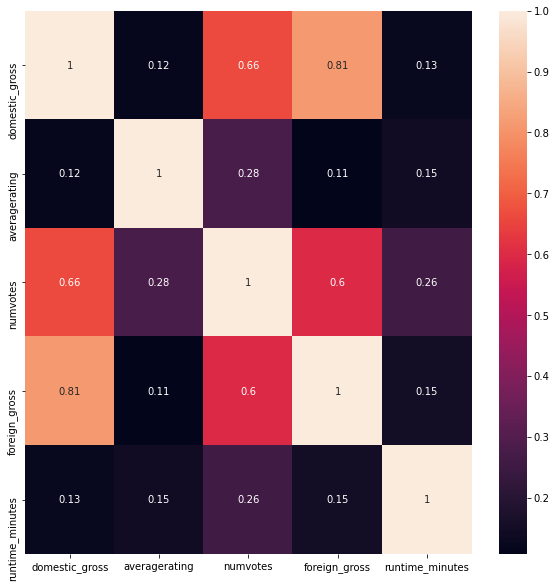

In [71]:
#Visualizing the correlation matrix

plt.subplots(figsize=(10,10))
sns.heatmap(merged_movie_df[['domestic_gross','averagerating','numvotes','foreign_gross','runtime_minutes']].corr(),annot=True)

**Observation** It seems movies with the highest number of votes has the highest correlation with domestic gross revenues

This shows that movies with high votes were very popular therefore gathering high revenues

In [72]:
#let's understand the relationship between genres domestic gross values

# means = merged_movie_df.groupby("genres")["domestic_gross"].mean()
# errors = merged_movie_df.groupby("genres")["domestic_gross"].std()

# plt.figure(figsize=(16, 6))
# plt.bar(x=means.index[:10], height=means.values[:10], yerr=errors.values[:10])
# plt.xticks(rotation=90)
# plt.show()


## 8. Conclusions

Our analysis has shown a number of **observations**:-

Movies tend to produce higher revenues in foreign markets as oppoed to domestic market

Movies with high number of votes tend to have greater gross revenues

The higher the number of votes the more popular that movie was.

The most common genres considering different variables as shows that Adventure, Drama, Sci-Fi, Acion are good performing genres 

1. For Domestic gross, best genres 

Adventure/Drama/Sport and Action/Adventure/Sci-Fi

2. For good ratings best genres

Adventure and Action/Sport

3. For higher votes best genres

Adventure/Drama/Sci-Fi and Adventure/Mystery/Sci-Fi

-


**After thorough analysis we conclude that:-**

Voting numbers are a good measure and indicator of how well a movie performed.

The films genres to produce that offer better chances of movie success include;

Adventure, Sci-Fi, Drama, Action, Mystery, Thriller, Sport, Fantansy, Romance

Therefore we **recommend** these genres as a niche for the films the studion should consider when making movies.

-

### Next steps

We need to consider more factors that may pose substantial influence on the success of films

This include;- 

* Actors/Directors

* Region preferences

* Marketing channels and investments etc. 
